## High-level overview

During this project I will create a model that predicts whether or not a customer will churn.
Churn occurs when customers discontinue or cancel their subscription to a service, and it is a major issue for telecom companies such as ours. Loss of customers can result in significant revenue loss and can even harm customer loyalty. However, with our model we will address this issue by predicting which customers are likely to churn and taking proactive measures to keep them.

In my possesion I have a dataset containing customer information and churn status. The dataset contains a variety of demographic and behavioural characteristics that can be used to build a predictive model.

The dataset provided contains three months of information about customers and their churn status, such as the number of number of days they made use of voice, sms, data services and products, how much of the services they made use of, the revenue generated from the services as well as a target label which indicates whether they have churned or not, where 1 is churned and 0 is not churned.

The **input training data** is from **1st September 2022 to 30th November 2022** and the **prediction month** is **1st to 30th December 2022.**

#### Data dictionary
<table>
<thead>
<tr>
<th>Feature Name</th>
<th>Feature Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>msisdn</td>
<td>Customer Indentifier, encrypted msisdn</td>
</tr>
<tr>
<td>tenure_mths_cnt</td>
<td>Customer's simcard age in month</td>
</tr>
<tr>
<td>gadget_type</td>
<td>The type of gadget( Mobile handset, router,laptop etc) </td>
</tr>
<tr>
<td>device_category</td>
<td>The technology generation of the device (2G,4G etc) </td>
</tr>
<tr>
<td>smart_phone_flag</td>
<td>Whether device is a smartphone or not or is unknown</td>
</tr>
<tr>
<td>manufacturer</td>
<td>The device manufacturer </td>
</tr>    
<tr>
<td>active_days_count_mthi</td>
<td>Total active days for month i, where mthi is mth2,...,mth4</td>
</tr>
<tr>
<td>data_active_days_count_mthi</td>
<td>Total data active days for month i, where mthi is mth2,...,mth4</td>
</tr>
<tr>
<td>data_usage_tot_rev_mthi</td>
<td>Total data revenue for month i, where mthi is mth2,...,mth4</td>
</tr>
<tr>
<td>paid_data_usage_mthi</td>
<td>Paid data usage for month i, where mthi is mth2,...,mth4</td>
</tr>
<tr>
<td>total_data_usage_mthi</td>
<td>Total free and paid data usage for month i, where mthi is mth2,...,mth4</td>
</tr>
<tr>
<td>recharge_tot_amount_mthi</td>
<td>Total recharge amount for month i, where mthi is mth2,...,mth4</td>
</tr>
<tr>
<td>sms_tot_rev_mthi</td>
<td>Total sms revenue for month i, where mthi is mth2,...,mth4</td>
</tr>
<tr>
<td>voice_active_days_count_mthi</td>
<td>Voice active days for month i, where mthi is mth2,...,mth4/td>
</tr>
<tr>
<td>voice_outgoing_tot_rev_mthi</td>
<td>Total revenue for outgoing voice activity for month i, where mthi is mth2,...,mth4</td>
</tr>
<tr>
<td>voice_outgoing_tot_duration_mthi</td>
<td>Total outgoing voice duration for  month i, where mthi is mth2,...,mth4</td>
</tr>
<td>voice_outgoing_onnet_duration_mthi</td>
<td>Vodacom to Vodacom outgoing duration for month i, where mthi is mth2,...,mth4</td>
</tr>
<tr>
<td>voice_outgoing_offnet_duration_mthi</td>
<td>Vodacom to non-Vodacom call duration for month i, where mthi is mth2,...,mth4</td>
</tr>
<tr>
<td>free_voice_outgoing_duration_mthi</td>
<td>Free outgoing duration for month i, where mthi is mth2,...,mth4</td>
</tr>
<tr>
<td>incoming_active_days_count_mthi</td>
<td>Incomming calls active days for month i, where mthi is mth2,...,mth4</td>
<tr>
<td>target</td>
<td>Total active days  for the target month: mth1</td>
</tr>
</tbody>
</table>

**Note:** "mth2" is the most recent month(November) and "mth4" is the most historical(September)

## Evaluation metrics

The evaluation metrics for this project is precision and recall for the positive class i.e. those that churned. **Precision** measures the number of customers that the model correctly predicted to churn. **Recall** measures the number of customers that churned that the model was able to predict correctly.  

In [1]:
# Loading libraries

import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
import math
%matplotlib inline

In [2]:
# Loading the train dataset
train_dataset_churn = pd.read_csv('train_dataset_churn.csv')

# 1. Data Exploration

In [3]:
# Display the initial train dataset
train_dataset_churn.head()

,msisdn,tenure_mths_cnt,gadget_type,device_category,smart_phone_flag,manufacturer,active_days_count_mth2,active_days_count_mth3,active_days_count_mth4,data_active_days_count_mth2,...,avg_voice_usage,avg_voice_onnet_usage,avg_voice_offnet_usage,avg_recharge_tot_amount,max_recharge_tot_amount,active_days_count_diff_mth2_3,active_days_count_diff_mth3_4,avg_active_days_diff,value_segment,target
0,40CFB1D0B475D316D9D54B679FFA2151,0.471311,mobile handset,3G,Yes,samsung,1.000000,0.967213,1.000000,1.000000,...,0.005506,0.005652,0.003285,0.001322,0.001691,0.066667,0.637363,0.500000,Medium,0.0
1,08135A1361613B7C19C2B6F8C8122BE0,0.094262,mobile handset,2G,No,itel,0.645161,0.688525,0.709677,0.000000,...,0.008004,0.010232,0.000018,0.001392,0.001492,0.266667,0.549451,0.467742,Low,0.0
2,5793DF96CF510204806499285DE9B516,0.008197,unknown,Unknown,Unknown,unknown,0.064516,0.081967,0.032258,0.000000,...,0.000928,0.000797,0.000922,0.000228,0.000411,0.900000,0.373626,0.516129,Low,0.0
3,CCF2CE46189B76202FD92F79DF49CF49,0.270492,unknown,Unknown,Unknown,unknown,0.096774,0.098361,0.064516,0.000000,...,0.001075,0.001339,0.000087,0.000234,0.000316,0.900000,0.373626,0.516129,Low,0.0
4,D730B2AC22724C3ADC5286367D2D1413,0.114754,mobile handset,2G,No,other,0.483871,0.377049,0.451613,0.032258,...,0.001679,0.002149,0.000000,0.000316,0.000458,0.733333,0.428571,0.516129,Low,0.0


In [4]:
# Display the size of our train dataset
df=train_dataset_churn
df.shape

(730908, 63)

<Axes: ylabel='Frequency'>

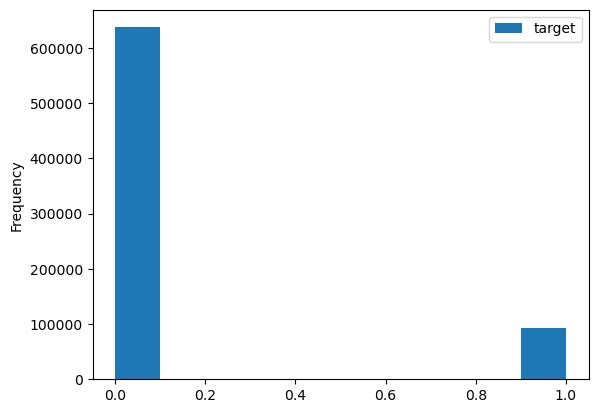

In [5]:
# Display the trend of churn status in the initial training dataset (0= not churched, 1=churned)
df['target'].plot.hist(legend=True)

In [6]:
# Display number of unique values per feature
df.nunique()

msisdn                           730908
tenure_mths_cnt                     245
gadget_type                          11
device_category                       5
smart_phone_flag                      3
                                  ...  
active_days_count_diff_mth2_3        31
active_days_count_diff_mth3_4        92
avg_active_days_diff                 63
value_segment                         4
target                                2
Length: 63, dtype: int64

In [7]:
# Here we an see that 5 features having 'object' as type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730908 entries, 0 to 730907
Data columns (total 63 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   msisdn                               730908 non-null  object 
 1   tenure_mths_cnt                      730908 non-null  float64
 2   gadget_type                          730908 non-null  object 
 3   device_category                      730908 non-null  object 
 4   smart_phone_flag                     730908 non-null  object 
 5   manufacturer                         730908 non-null  object 
 6   active_days_count_mth2               730908 non-null  float64
 7   active_days_count_mth3               730908 non-null  float64
 8   active_days_count_mth4               730908 non-null  float64
 9   data_active_days_count_mth2          730908 non-null  float64
 10  data_active_days_count_mth3          730908 non-null  float64
 11  data_active_d

# 2. Data visualization

C:\Users\pkowa\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x500 with 0 Axes>

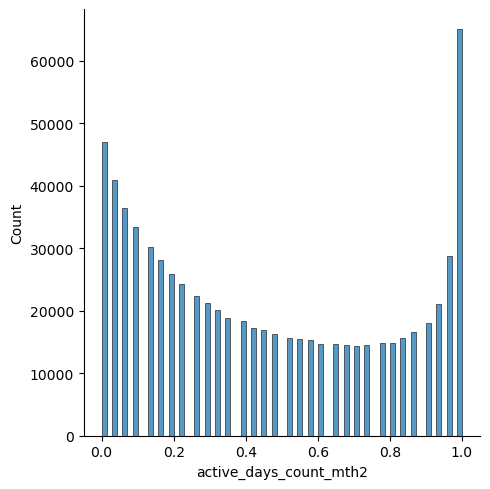

In [8]:
plt.figure(figsize=(16,5))
sns.displot(df['active_days_count_mth2'])

plt.show()

C:\Users\pkowa\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x500 with 0 Axes>

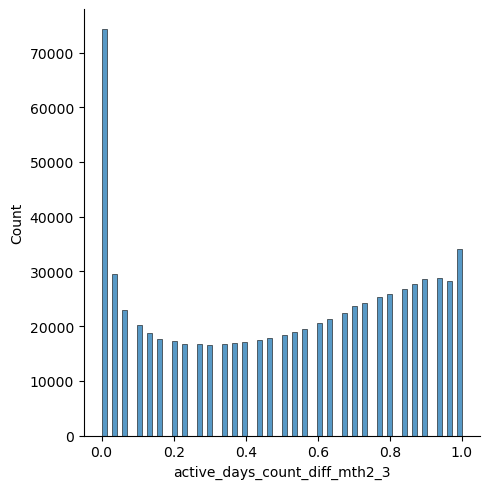

In [9]:
plt.figure(figsize=(16,5))
sns.displot(df['active_days_count_diff_mth2_3'])

plt.show()

C:\Users\pkowa\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x500 with 0 Axes>

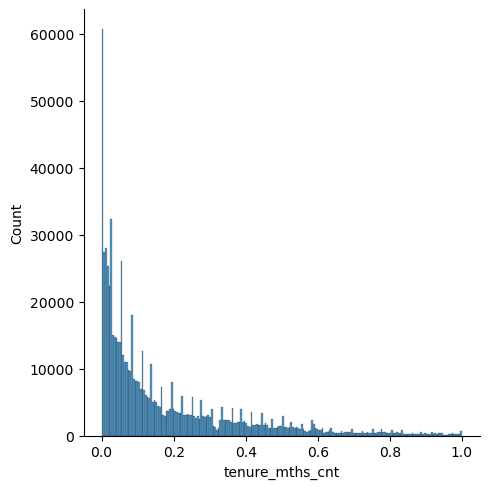

In [10]:
plt.figure(figsize=(16,5))
sns.displot(df['tenure_mths_cnt'])

plt.show()

C:\Users\pkowa\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x500 with 0 Axes>

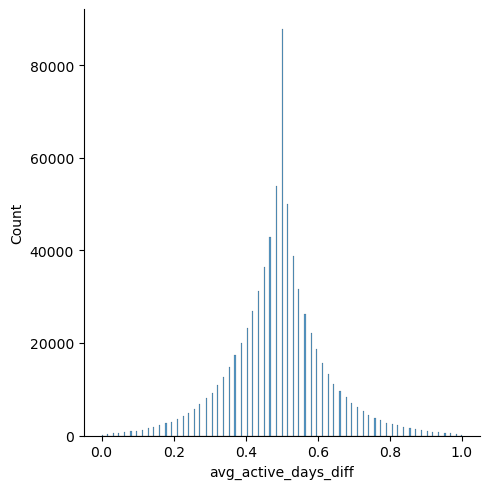

In [11]:
plt.figure(figsize=(16,5))
sns.displot(df['avg_active_days_diff'])
plt.show()

C:\Users\pkowa\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x500 with 0 Axes>

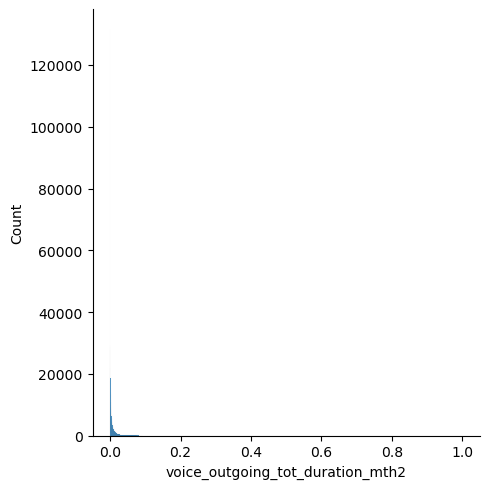

In [12]:
plt.figure(figsize=(16,5))
sns.displot(df['voice_outgoing_tot_duration_mth2'])
plt.show()

C:\Users\pkowa\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x500 with 0 Axes>

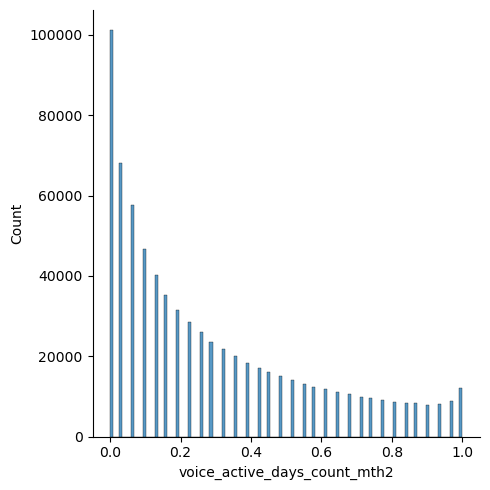

In [13]:
plt.figure(figsize=(16,5))
sns.displot(df['voice_active_days_count_mth2'])
plt.show()

C:\Users\pkowa\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x500 with 0 Axes>

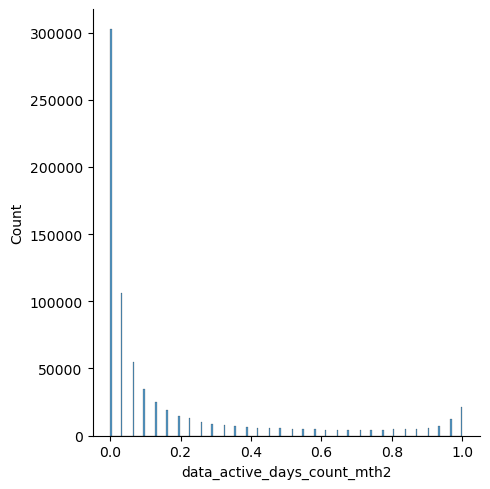

In [14]:
plt.figure(figsize=(16,5))
sns.displot(df['data_active_days_count_mth2'])
plt.show()

C:\Users\pkowa\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x500 with 0 Axes>

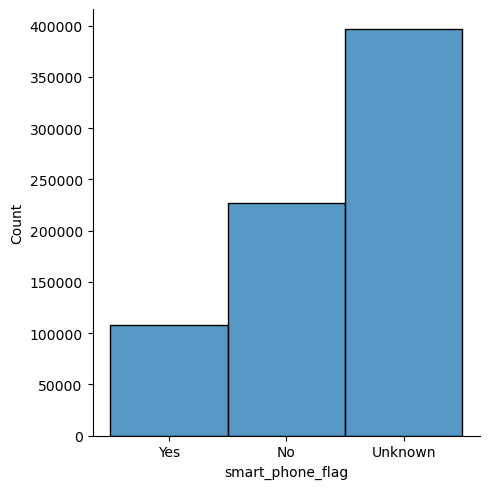

In [15]:
plt.figure(figsize=(16,5))
sns.displot(df['smart_phone_flag'])
plt.show()

C:\Users\pkowa\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x500 with 0 Axes>

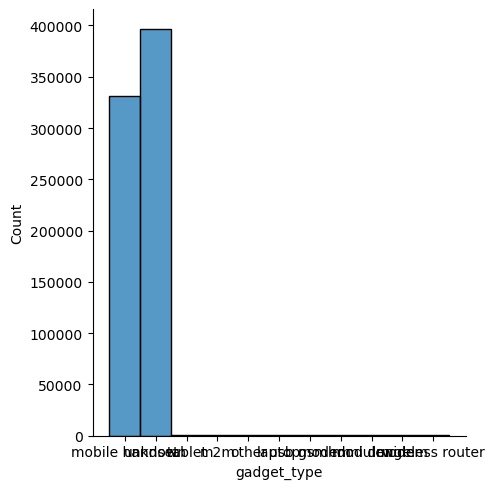

In [16]:
plt.figure(figsize=(16,5))
sns.displot(df['gadget_type'])
plt.show()

C:\Users\pkowa\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x500 with 0 Axes>

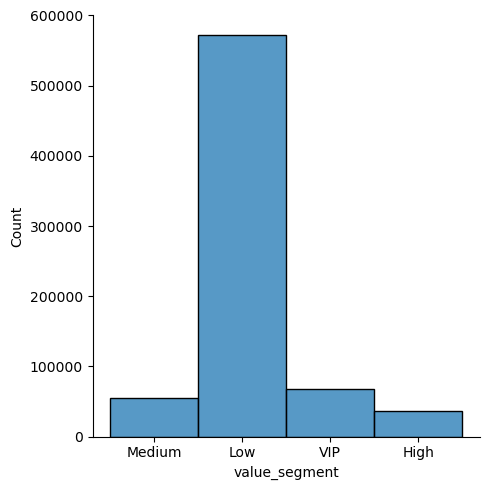

In [17]:
plt.figure(figsize=(16,5))
sns.displot(df['value_segment'])
plt.show()

# 3. Data Preprocessing

In [18]:
# Delete the MSISDN column
df=train_dataset_churn
df=df.drop(['msisdn'],axis=1)

In [19]:
# drop duplicates
df = df.drop_duplicates()

# remove rows where all columns are missing values
df.dropna(how = 'all')

,tenure_mths_cnt,gadget_type,device_category,smart_phone_flag,manufacturer,active_days_count_mth2,active_days_count_mth3,active_days_count_mth4,data_active_days_count_mth2,data_active_days_count_mth3,...,avg_voice_usage,avg_voice_onnet_usage,avg_voice_offnet_usage,avg_recharge_tot_amount,max_recharge_tot_amount,active_days_count_diff_mth2_3,active_days_count_diff_mth3_4,avg_active_days_diff,value_segment,target
0,0.471311,mobile handset,3G,Yes,samsung,1.000000,0.967213,1.000000,1.000000,0.933333,...,0.005506,0.005652,0.003285,0.001322,0.001691,0.066667,0.637363,0.500000,Medium,0.0
1,0.094262,mobile handset,2G,No,itel,0.645161,0.688525,0.709677,0.000000,0.000000,...,0.008004,0.010232,0.000018,0.001392,0.001492,0.266667,0.549451,0.467742,Low,0.0
2,0.008197,unknown,Unknown,Unknown,unknown,0.064516,0.081967,0.032258,0.000000,0.000000,...,0.000928,0.000797,0.000922,0.000228,0.000411,0.900000,0.373626,0.516129,Low,0.0
3,0.270492,unknown,Unknown,Unknown,unknown,0.096774,0.098361,0.064516,0.000000,0.000000,...,0.001075,0.001339,0.000087,0.000234,0.000316,0.900000,0.373626,0.516129,Low,0.0
4,0.114754,mobile handset,2G,No,other,0.483871,0.377049,0.451613,0.032258,0.000000,...,0.001679,0.002149,0.000000,0.000316,0.000458,0.733333,0.428571,0.516129,Low,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730903,0.012295,unknown,Unknown,Unknown,unknown,1.000000,1.000000,0.967742,0.000000,0.000000,...,0.002067,0.002644,0.000000,0.000187,0.000379,0.000000,0.670330,0.516129,Low,0.0
730904,0.000000,unknown,Unknown,Unknown,unknown,0.903226,0.852459,0.032258,0.000000,0.033333,...,0.001507,0.001928,0.000000,0.001211,0.001423,0.200000,0.890110,0.935484,Low,0.0
730905,0.000000,unknown,Unknown,Unknown,unknown,0.193548,0.377049,0.870968,0.000000,0.000000,...,0.007681,0.009419,0.000960,0.000468,0.001091,0.433333,0.285714,0.161290,Low,1.0
730906,0.040984,mobile handset,Non-Data,Yes,itel,0.258065,0.327869,0.483871,0.193548,0.266667,...,0.001578,0.001091,0.002190,0.001714,0.002529,0.600000,0.384615,0.387097,VIP,0.0


In [20]:
# Converting below columns type to Categorical by adding new columns
df.gadget_type=pd.Categorical(df.gadget_type)
df['gadget_type1']=df.gadget_type.cat.codes

df.device_category=pd.Categorical(df.device_category)
df['device_category1']=df.device_category.cat.codes

df.smart_phone_flag=pd.Categorical(df.smart_phone_flag)
df['smart_phone_flag1']=df.smart_phone_flag.cat.codes

df.manufacturer=pd.Categorical(df.manufacturer)
df['manufacturer1']=df.manufacturer.cat.codes

df.value_segment=pd.Categorical(df.value_segment)
df['value_segment1']=df.value_segment.cat.codes

In [21]:
# Removing old colums
X=df.drop(['gadget_type', 'device_category', 'smart_phone_flag', 'manufacturer', 'value_segment'],axis=1)

In [22]:
X.head()

,tenure_mths_cnt,active_days_count_mth2,active_days_count_mth3,active_days_count_mth4,data_active_days_count_mth2,data_active_days_count_mth3,data_active_days_count_mth4,data_usage_tot_rev_mth2,data_usage_tot_rev_mth3,data_usage_tot_rev_mth4,...,max_recharge_tot_amount,active_days_count_diff_mth2_3,active_days_count_diff_mth3_4,avg_active_days_diff,target,gadget_type1,device_category1,smart_phone_flag1,manufacturer1,value_segment1
0,0.471311,1.000000,0.967213,1.000000,1.000000,0.933333,1.000000,7.829604e-04,0.000862,0.001776,...,0.001691,0.066667,0.637363,0.500000,0.0,4,1,2,7,2
1,0.094262,0.645161,0.688525,0.709677,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.001492,0.266667,0.549451,0.467742,0.0,4,0,0,3,1
2,0.008197,0.064516,0.081967,0.032258,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000411,0.900000,0.373626,0.516129,0.0,8,4,1,9,1
3,0.270492,0.096774,0.098361,0.064516,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000316,0.900000,0.373626,0.516129,0.0,8,4,1,9,1
4,0.114754,0.483871,0.377049,0.451613,0.032258,0.000000,0.032258,1.149671e-08,0.000000,0.000000,...,0.000458,0.733333,0.428571,0.516129,0.0,4,0,0,6,1


In [23]:
X.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,tenure_mths_cnt,active_days_count_mth2,active_days_count_mth3,active_days_count_mth4,data_active_days_count_mth2,data_active_days_count_mth3,data_active_days_count_mth4,data_usage_tot_rev_mth2,data_usage_tot_rev_mth3,data_usage_tot_rev_mth4,paid_data_usage_mth2,paid_data_usage_mth3,paid_data_usage_mth4,total_data_usage_mth2,total_data_usage_mth3,total_data_usage_mth4,recharge_tot_amount_mth2,recharge_tot_amount_mth3,recharge_tot_amount_mth4,sms_tot_rev_mth2,sms_tot_rev_mth3,sms_tot_rev_mth4,voice_active_days_count_mth2,voice_active_days_count_mth3,voice_active_days_count_mth4,voice_outgoing_tot_rev_mth2,voice_outgoing_tot_rev_mth3,voice_outgoing_tot_rev_mth4,voice_outgoing_tot_duration_mth2,voice_outgoing_tot_duration_mth3,voice_outgoing_tot_duration_mth4,voice_outgoing_onnet_duration_mth2,voice_outgoing_onnet_duration_mth3,voice_outgoing_onnet_duration_mth4,voice_outgoing_offnet_duration_mth2,voice_outgoing_offnet_duration_mth3,voice_outgoing_offnet_duration_mth4,free_voice_outgoing_duration_mth2,free_voice_outgoing_duration_mth3,free_voice_outgoing_duration_mth4,incoming_active_days_count_mth2,incoming_active_days_count_mth3,incoming_active_days_count_mth4,total_revenue_mth2,total_revenue_mth3,total_revenue_mth4,avg_data_usage,avg_paid_data_usage,avg_voice_usage,avg_voice_onnet_usage,avg_voice_offnet_usage,avg_recharge_tot_amount,max_recharge_tot_amount,active_days_count_diff_mth2_3,active_days_count_diff_mth3_4,avg_active_days_diff,target,gadget_type1,device_category1,smart_phone_flag1,manufacturer1,value_segment1
tenure_mths_cnt,1.0,0.1784,0.1789,0.1821,0.1327,0.1209,0.1269,0.0974,0.0914,0.08992,0.09737,0.09167,0.09015,0.09747,0.09176,0.09019,0.1873,0.1808,0.1691,0.04237,0.04205,0.04704,0.2528,0.2377,0.252,0.1069,0.1031,0.1118,0.1813,0.1635,0.1531,0.1574,0.1394,0.1284,0.139,0.1339,0.1368,0.004099,0.00314,0.002784,0.02468,0.02625,0.02821,0.09748,0.09148,0.09001,0.09758,0.09749,0.1789,0.153,0.1492,0.1887,0.1773,-0.1607,0.1228,-0.002452,-0.1318,-0.05108,-0.0241,0.07641,-0.007723,0.1067
active_days_count_mth2,0.1784,1.0,0.9518,0.7096,0.5622,0.4686,0.4227,0.2955,0.259,0.2431,0.2953,0.2592,0.2427,0.2956,0.2594,0.2428,0.349,0.3919,0.3341,0.03834,0.0368,0.03779,0.6897,0.5637,0.5047,0.1354,0.1131,0.1048,0.4341,0.3675,0.3261,0.4143,0.3497,0.3082,0.216,0.181,0.1655,0.004966,0.004426,0.00424,0.01409,0.01629,0.01893,0.2956,0.2591,0.2431,0.2785,0.2783,0.4042,0.385,0.2048,0.3803,0.3593,-0.8005,0.8637,0.3925,-0.3637,0.04916,0.09779,0.1955,0.08821,0.2929
active_days_count_mth3,0.1789,0.9518,1.0,0.7928,0.5458,0.5388,0.4668,0.2939,0.2814,0.2595,0.2938,0.2816,0.259,0.2941,0.2818,0.2591,0.3473,0.3843,0.3674,0.0382,0.03957,0.03981,0.6576,0.6576,0.558,0.1277,0.1312,0.1162,0.4233,0.4136,0.3575,0.4049,0.3929,0.3381,0.2077,0.2056,0.1807,0.005015,0.004845,0.00466,0.01629,0.01528,0.01917,0.294,0.2815,0.2595,0.2916,0.2913,0.4289,0.4089,0.2163,0.3904,0.3728,-0.9457,0.869,0.2204,-0.3325,0.04981,0.1009,0.202,0.0906,0.3047
active_days_count_mth4,0.1821,0.7096,0.7928,1.0,0.4256,0.4658,0.5552,0.2504,0.2527,0.2781,0.2503,0.2529,0.2775,0.2505,0.2531,0.2776,0.2996,0.3175,0.3249,0.03283,0.03548,0.04195,0.5058,0.5629,0.698,0.09599,0.1096,0.1449,0.3417,0.3659,0.4164,0.3285,0.3493,0.393,0.1624,0.1766,0.2133,0.003952,0.003965,0.004037,0.01843,0.01693,0.01428,0.2505,0.2528,0.2782,0.2729,0.2728,0.407,0.3892,0.2012,0.3346,0.3209,-0.7974,0.3872,-0.3696,-0.2441,0.04286,0.09139,0.1831,0.08179,0.2863
data_active_days_count_mth2,0.1327,0.5622,0.5458,0.4256,1.0,0.8414,0.755,0.5424,0.4831,0.4545,0.5421,0.4836,0.454,0.5426,0.4841,0.4542,0.3243,0.3588,0.3182,0.03072,0.0315,0.03114,0.2131,0.1853,0.1721,0.06602,0.06106,0.05929,0.1661,0.1486,0.1342,0.1315,0.1159,0.1025,0.1673,0.157,0.1559,0.005137,0.003503,0.003005,0.01709,0.02164,0.02416,0.5424,0.4831,0.4545,0.517,0.5166,0.1611,0.1258,0.1748,0.3545,0.3389,-0.4711,0.4801,0.1858,-0.1616,-0.01009,0.06604,0.3491,0.07871,0.5367
data_active_days_count_mth3,0.1209,0.4686,0.5388,0.4658,0.8414,1.0,0.8387,0.4844,0.5144,0.4721,0.4843,0.51

In [24]:
# With the following function we can select highly correlated features based n a certain threshold.

def correlation(dataset, threshold):
    """
    Detect all features strongly correlated to each others.
 
    Args:
        dataset (datafame): The dataset we are using.
        threshold:                  
    Returns:
        col_corr : The list of all detected featues.
    """
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [25]:
# Count of features strongly correlated to each others (> 0.7)

corr_features = correlation(X, 0.7)
len(set(corr_features))

42

In [26]:
# List the features strongly corre;ated to each others

corr_features

{'active_days_count_diff_mth3_4',
 'active_days_count_mth3',
 'active_days_count_mth4',
 'avg_data_usage',
 'avg_paid_data_usage',
 'avg_recharge_tot_amount',
 'avg_voice_offnet_usage',
 'avg_voice_onnet_usage',
 'avg_voice_usage',
 'data_active_days_count_mth3',
 'data_active_days_count_mth4',
 'data_usage_tot_rev_mth3',
 'data_usage_tot_rev_mth4',
 'device_category1',
 'free_voice_outgoing_duration_mth3',
 'free_voice_outgoing_duration_mth4',
 'manufacturer1',
 'max_recharge_tot_amount',
 'paid_data_usage_mth2',
 'paid_data_usage_mth3',
 'paid_data_usage_mth4',
 'recharge_tot_amount_mth3',
 'recharge_tot_amount_mth4',
 'sms_tot_rev_mth3',
 'sms_tot_rev_mth4',
 'total_data_usage_mth2',
 'total_data_usage_mth3',
 'total_data_usage_mth4',
 'total_revenue_mth2',
 'total_revenue_mth3',
 'total_revenue_mth4',
 'voice_active_days_count_mth3',
 'voice_active_days_count_mth4',
 'voice_outgoing_offnet_duration_mth3',
 'voice_outgoing_offnet_duration_mth4',
 'voice_outgoing_onnet_duration_mth2'

In [27]:
# Removing these features from the dataset

X.drop(corr_features, axis=1, inplace=True)

In [28]:
X.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,tenure_mths_cnt,active_days_count_mth2,data_active_days_count_mth2,data_usage_tot_rev_mth2,recharge_tot_amount_mth2,sms_tot_rev_mth2,voice_active_days_count_mth2,voice_outgoing_tot_rev_mth2,voice_outgoing_tot_duration_mth2,voice_outgoing_offnet_duration_mth2,free_voice_outgoing_duration_mth2,incoming_active_days_count_mth2,incoming_active_days_count_mth3,incoming_active_days_count_mth4,active_days_count_diff_mth2_3,avg_active_days_diff,target,gadget_type1,smart_phone_flag1,value_segment1
tenure_mths_cnt,1.0,0.1784,0.1327,0.0974,0.1873,0.04237,0.2528,0.1069,0.1813,0.139,0.004099,0.02468,0.02625,0.02821,-0.1607,-0.002452,-0.1318,-0.05108,0.07641,0.1067
active_days_count_mth2,0.1784,1.0,0.5622,0.2955,0.349,0.03834,0.6897,0.1354,0.4341,0.216,0.004966,0.01409,0.01629,0.01893,-0.8005,0.3925,-0.3637,0.04916,0.1955,0.2929
data_active_days_count_mth2,0.1327,0.5622,1.0,0.5424,0.3243,0.03072,0.2131,0.06602,0.1661,0.1673,0.005137,0.01709,0.02164,0.02416,-0.4711,0.1858,-0.1616,-0.01009,0.3491,0.5367
data_usage_tot_rev_mth2,0.0974,0.2955,0.5424,1.0,0.3863,0.0324,0.139,0.08846,0.1362,0.1884,0.0008155,0.01904,0.02296,0.03393,-0.2613,0.06284,-0.07484,-0.008184,0.2036,0.5152
recharge_tot_amount_mth2,0.1873,0.349,0.3243,0.3863,1.0,0.1444,0.3845,0.4035,0.4993,0.3675,0.001896,0.08168,0.1062,0.08904,-0.3089,0.06921,-0.1388,0.02549,0.1412,0.2744
sms_tot_rev_mth2,0.04237,0.03834,0.03072,0.0324,0.1444,1.0,0.04949,0.2038,0.09371,0.08076,-0.000113,0.04843,0.05194,0.04903,-0.03403,0.007719,-0.01072,-0.001089,0.01475,0.02431
voice_active_days_count_mth2,0.2528,0.6897,0.2131,0.139,0.3845,0.04949,1.0,0.2326,0.6462,0.3294,0.006825,0.0213,0.02386,0.02542,-0.5542,0.2494,-0.2694,0.05373,0.08064,0.1298
voice_outgoing_tot_rev_mth2,0.1069,0.1354,0.06602,0.08846,0.4035,0.2038,0.2326,1.0,0.3073,0.404,7.92e-06,0.1328,0.1504,0.1469,-0.1061,0.05331,-0.04953,0.0129,0.02645,0.05268
voice_outgoing_tot_duration_mth2,0.1813,0.4341,0.1661,0.1362,0.4993,0.09371,0.6462,0.3073,1.0,0.4802,0.00933,0.04337,0.05185,0.06024,-0.3672,0.1264,-0.137,0.05461,0.06746,0.1203
voice_outgoing_offnet_duration_mth2,0.139,0.216,0.1673,0.1884,0.3675,0.08076,0.3294,0.404,0.4802,1.0,0.005308,0.05605,0.06157,0.07655,-0.177,0.07281,-0.07221,0.01159,0.06438,0.1393


In [29]:
# Split dataset between data and target

Y=X['target']
X=X.drop(['target'],axis=1)
X.shape, Y.shape

((730781, 19), (730781,))

# 4. Predictive Modeling

In [30]:
# Create a test dataset for training our model.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3, random_state=42)

In [31]:
## Selection of the best algirithm for our dataset 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

names = ["XGBoost", "Decision_Tree", "Naive_Bayes", "Neural_Net", "Gradient_Boosting", "Extra_Trees", "QDA", "SGD", "AdaBoost"]

classifiers = [
    XGBClassifier(),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    MLPClassifier(alpha=1, max_iter=1000),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2"),
    AdaBoostClassifier(n_estimators=100)]

scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)
    
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df.sort_values('score', ascending=False)
#######

C:\Users\pkowa\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,name,score
0,XGBoost,0.920692
4,Gradient_Boosting,0.919607
8,AdaBoost,0.916583
1,Decision_Tree,0.910188
5,Extra_Trees,0.896955
3,Neural_Net,0.871882
7,SGD,0.871882
2,Naive_Bayes,0.468890
6,QDA,0.462777


In [32]:
# Training model using XGBoost algorithm (The choosen one)
model_xgbc = XGBClassifier()
model_xgbc.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

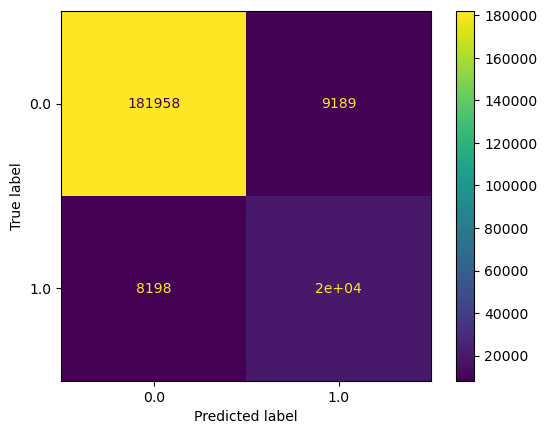

In [33]:
# Confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model_xgbc, X_test, Y_test)

In [34]:
# Trying a prediction
y_pred = model_xgbc.predict(X_test)

In [35]:
# Evaluating of model

wrong_pred=(Y_test != y_pred).sum()
print("Total Wrongly predicted = {}".format(wrong_pred))

Total Wrongly predicted = 17387


In [36]:
# Classification report for test data

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95    191147
         1.0       0.68      0.71      0.70     28088

    accuracy                           0.92    219235
   macro avg       0.82      0.83      0.83    219235
weighted avg       0.92      0.92      0.92    219235



In [37]:
# Classification report for train data

y_pred_train = model_xgbc.predict(X_train)
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96    446055
         1.0       0.70      0.72      0.71     65491

    accuracy                           0.92    511546
   macro avg       0.83      0.84      0.83    511546
weighted avg       0.93      0.92      0.93    511546



# 5. Hyper paameter optimization

In [59]:
## Setup initial values for Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [60]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X,Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [61]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [62]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.15,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [91]:
from numpy import nan
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

In [92]:
classifier.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [93]:
# Classification report for train data after HYPER PARAMETER OPTIMIZATION

y_pred_train = classifier.predict(X_train)
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    446055
         1.0       0.86      0.90      0.88     65491

    accuracy                           0.97    511546
   macro avg       0.92      0.94      0.93    511546
weighted avg       0.97      0.97      0.97    511546



In [45]:
# Now preparing the non-labeled data for themfinal prediction
# ===========================================================

test_dataset_churn = pd.read_csv('test_dataset_churn.csv')
test_dataset_churn.head()

# Saving the MSISDN
msisdn_test_dataset_churn = test_dataset_churn["msisdn"]
test_dataset_churn.drop(['msisdn'], axis=1, inplace=True)

In [46]:
# drop duplicates
test_dataset_churn = test_dataset_churn.drop_duplicates()

# remove rows where all columns are missing values
test_dataset_churn.dropna(how = 'all')

,tenure_mths_cnt,gadget_type,device_category,smart_phone_flag,manufacturer,active_days_count_mth2,active_days_count_mth3,active_days_count_mth4,data_active_days_count_mth2,data_active_days_count_mth3,...,avg_paid_data_usage,avg_voice_usage,avg_voice_onnet_usage,avg_voice_offnet_usage,avg_recharge_tot_amount,max_recharge_tot_amount,active_days_count_diff_mth2_3,active_days_count_diff_mth3_4,avg_active_days_diff,value_segment
0,0.000000,unknown,Unknown,Unknown,unknown,0.000000,0.131148,0.032258,0.000000,0.000000,...,3.392080e-04,0.001130,0.001445,0.000000,0.000170,0.000411,0.733333,0.406593,0.483871,Medium
1,0.405738,mobile handset,2G,No,itel,0.129032,0.180328,0.032258,0.096774,0.066667,...,0.000000e+00,0.000970,0.001241,0.000000,0.000158,0.000316,0.766667,0.439560,0.548387,Low
2,0.086066,mobile handset,2G,No,itel,0.032258,0.081967,0.129032,0.032258,0.033333,...,0.000000e+00,0.000749,0.000745,0.000503,0.000035,0.000047,0.866667,0.340659,0.451613,Low
3,0.057377,unknown,Unknown,Unknown,unknown,0.000000,0.049180,0.129032,0.032258,0.033333,...,6.340000e-07,0.000004,0.000001,0.000009,0.000000,0.000000,0.900000,0.318681,0.435484,Low
4,0.040984,mobile handset,2G,No,tecno,0.774194,0.721311,0.032258,0.032258,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.802198,0.870968,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91359,0.221311,mobile handset,2G,No,itel,0.580645,0.655738,0.806452,0.000000,0.000000,...,0.000000e+00,0.000539,0.000690,0.000000,0.000111,0.000126,0.266667,0.494505,0.387097,Low
91360,0.131148,mobile handset,2G,No,other,0.096774,0.131148,0.258065,0.000000,0.000000,...,0.000000e+00,0.002026,0.002060,0.001257,0.000192,0.000237,0.833333,0.329670,0.419355,Low
91361,0.004098,mobile handset,Non-Data,No,itel,0.870968,0.655738,0.451613,0.032258,0.000000,...,0.000000e+00,0.002060,0.002635,0.000000,0.000697,0.001170,0.566667,0.615385,0.709677,Low
91362,0.024590,mobile handset,Non-Data,No,samsung,0.129032,0.229508,0.193548,0.000000,0.033333,...,0.000000e+00,0.000822,0.000051,0.002364,0.000216,0.000364,0.666667,0.417582,0.467742,Low


In [47]:
# Type convertion to Categorical
test_dataset_churn.gadget_type=pd.Categorical(test_dataset_churn.gadget_type)
test_dataset_churn['gadget_type1']=test_dataset_churn.gadget_type.cat.codes

test_dataset_churn.device_category=pd.Categorical(test_dataset_churn.device_category)
test_dataset_churn['device_category1']=test_dataset_churn.device_category.cat.codes

test_dataset_churn.smart_phone_flag=pd.Categorical(test_dataset_churn.smart_phone_flag)
test_dataset_churn['smart_phone_flag1']=test_dataset_churn.smart_phone_flag.cat.codes

test_dataset_churn.manufacturer=pd.Categorical(test_dataset_churn.manufacturer)
test_dataset_churn['manufacturer1']=test_dataset_churn.manufacturer.cat.codes

test_dataset_churn.value_segment=pd.Categorical(test_dataset_churn.value_segment)
test_dataset_churn['value_segment1']=test_dataset_churn.value_segment.cat.codes

test_dataset_churn.drop(['gadget_type', 'device_category', 'smart_phone_flag', 'manufacturer', 'value_segment'],axis=1, inplace=True)
#test_dataset_churn.head()

In [48]:
test_dataset_churn.drop(corr_features,axis=1, inplace=True)

In [49]:
test_dataset_churn.shape

(91360, 19)

In [50]:
predictions = classifier.predict(test_dataset_churn)

<Axes: >

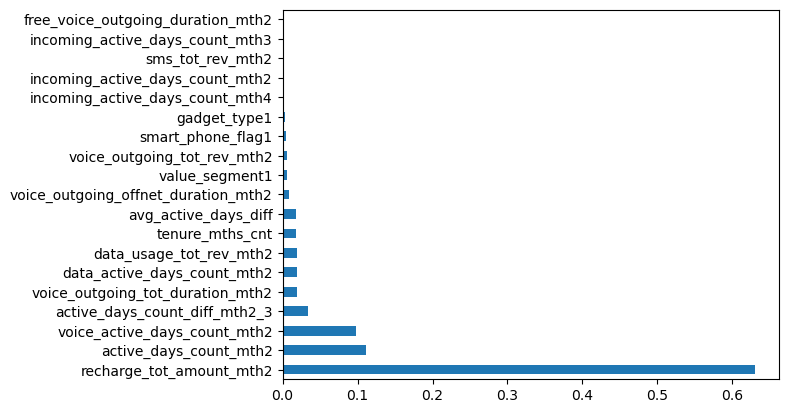

In [51]:
# Feature importance
feature_importance = pd.DataFrame(classifier.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance',ascending=False)
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [52]:
# Converting the predictions from array to dataframe

finaltarget = pd.DataFrame({'target':predictions})
#finaltarget.head(5)

In [53]:
# Adding the predicted label (target) in the test dataset to predict

PredictedDatasetWithTarget = pd.concat([msisdn_test_dataset_churn, finaltarget], axis=1)

In [54]:
PredictedDatasetWithTarget.head(10)

,msisdn,target
0,028D60F7F40E18BC63C43883B6B6EFD7,1.0
1,4AB05A575719E7BFC3DD30968D608367,0.0
2,47366A6051322F08A46B327FBBAD03AC,0.0
3,B7221E307F39F210781D6E9529B213D1,1.0
4,A6086B2E16BF1630AD75AEA6D21714C2,0.0
5,5083232184FB555336223FC396582C0F,0.0
6,AAC714A2A37A8CCA7BE607D4512510DA,0.0
7,48F6E0435A901715789FA6F4C5DE5511,0.0
8,3B3E4A01B8C1F64B1D38D0D655DA7BC0,0.0
9,3146CB2E421F28E83174FD200BB47C0E,0.0


In [55]:
PredictedDatasetWithTarget.shape

(91364, 2)

<Axes: ylabel='Frequency'>

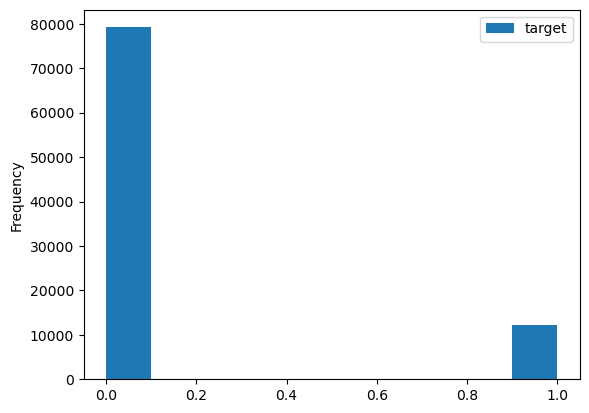

In [56]:
# Trend of predicted churns in the test dataset
PredictedDatasetWithTarget['target'].plot.hist(legend=True)

In [57]:
# Count, group by target column
PredictedDatasetWithTarget['target'].value_counts()

target
0.0    79200
1.0    12160
Name: count, dtype: int64

In [58]:
# Generate a file contaning the MSISDN predited alog with the their churn status
PredictedDatasetWithTarget.to_csv('nanodegree_capstonep8roject_churn_prediction.csv', index=False)

# 6. Conclusion

After this treatment, we put in place our model helping us to predict yes or not a customer will be churched.
We have to notice also basd on the result of the feature importance, the feature influencing the more the churn status if the **recharge_tot_amount**.

As Telecom industry, it's important to seat and create strategy to push customers to recharge more in order to reduce the number of churn.

CVM campaign is also one of strategy by providing  certain reward after the recharge.